Original Shape: (1296675, 23)
Sample Shape: (50000, 23)
Target Column: is_fraud

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9941
           1       0.00      0.00      0.00        59

    accuracy                           0.99     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


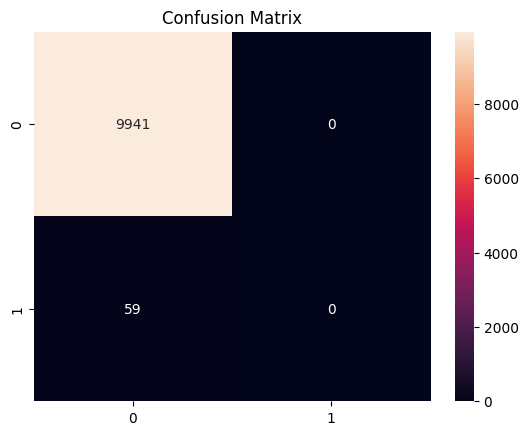

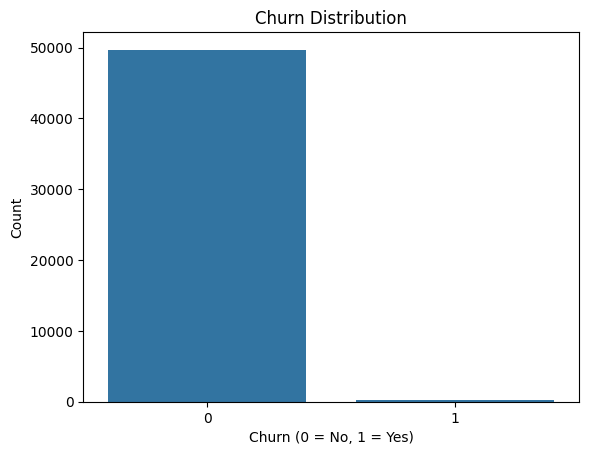

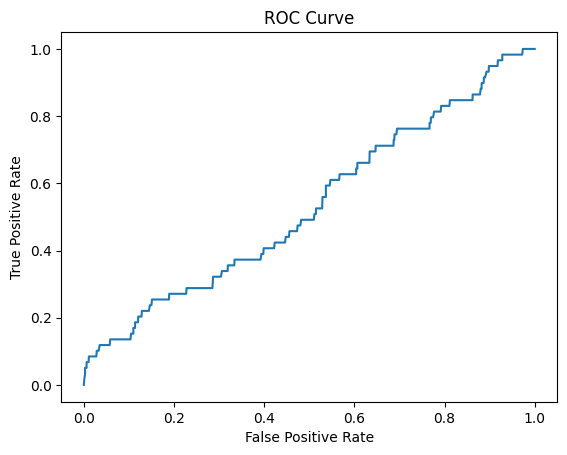

ROC-AUC Score: 0.5333561231605455


In [26]:

import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


data_path = "/kaggle/input"
file_path = None

for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        if filename.endswith(".csv"):
            file_path = os.path.join(dirname, filename)

df = pd.read_csv(file_path)

print("Original Shape:", df.shape)



df = df.sample(n=50000, random_state=42)   # reduce size
print("Sample Shape:", df.shape)


target_col = None
for col in df.columns:
    if df[col].nunique() == 2:
        target_col = col

print("Target Column:", target_col)


le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])



X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



model = LogisticRegression(
    max_iter=500,
    solver='liblinear'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x=target_col, data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

